In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.options.display.max_columns = None
import math

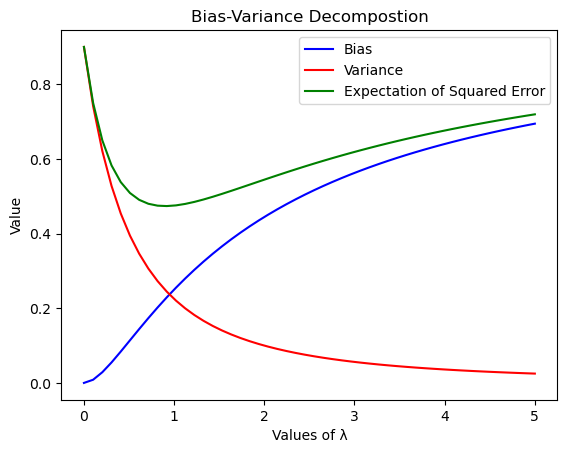

In [2]:
#Given starting point values
mean = 1                             #Mean
var = 9                              #Variance
n = 10                               #Number of Samples
std = math.sqrt(var)                 #Value of standard deviation or sigma
lambda_range = np.linspace(0, 5, 50) #Lambda values

#Compute the Bias, Variance and Expectation of the squared-distance
Bias = ((mean*lambda_range)/(lambda_range+1))**2
Variance = (((std**2)/n))*(1/((lambda_range+1)**2))
#Expectation of Squared Error: Based on Bias-Variance decomposition equation
ESE = Bias + Variance 

#Plot the graph
plt.plot(lambda_range, Bias, label='Bias', color='blue')
plt.plot(lambda_range, Variance, label='Variance', color='red')
plt.plot(lambda_range, ESE, label='Expectation of Squared Error', color='green')
plt.xlabel('Values of \u03BB')
plt.ylabel('Value')
plt.title("Bias-Variance Decompostion")
plt.legend()
plt.show()

In [3]:

'''
Load the Boston housing data from the sklearn datasets module
'''
def load_data():
    

    # Load the Boston dataset from OpenML
    boston = fetch_openml(name="boston", version=1, as_frame=True)
    #boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    #print(boston.DESCR) #Uncomment to obtain the description of the dataset
    
    return X, y, features

In [4]:
'''
Describe and summarize the data in terms of number of data points, dimensions, target, etc
'''
def summarize(df, targetcol):
    #Describe the basic stasitiscs ie.e count, mean, standard deviation, mininum, maximum....
    print(df.describe(include = 'all'))
    print('\n')
    
    #Obtain the features the dataset
    feature = df.columns[:-1]
    print("Features: ", feature)
    print('\n')

    #Sample data
    print("Data Sample:")
    print(df.head())
    print('\n')

    #Obtain the total number of input of features the dataset
    print("Input Dimensions or Number of Features (excluding target variable): ")
    print(df.shape[1]-1)
    print('\n')

    #Obtain the Total number of Data Points
    print("Total number of Data Points: ")
    print(df.shape[0])
    print('\n')
    
    #Describe the target column's basic stasitiscs ie.e count, mean, standard deviation, mininum, maximum....
    #This is already provided in the df.describe, since df contains the total dataset (features + target)
    print("For Target Variable: ")
    print(targetcol.describe(include = 'all'))
    print("\n")

In [5]:
#A function to scale the dataframe features between 0 and 1 using the min and max values for each feature
def scaled(df):   
    result = df.copy()
    for feature in df.columns:
        if df[feature].dtype.name == 'category':
            df[feature] = df[feature].cat.codes
            max_value = df[feature].max()
            min_value = df[feature].min()
            result[feature] = (df[feature] - min_value) / (max_value - min_value)
        else:
            max_value = df[feature].max()
            min_value = df[feature].min()
            result[feature] = (df[feature] - min_value) / (max_value - min_value)
    
    return result

In [6]:
'''
Visualization: present a single grid containing plots for each feature against the target.
'''
def visualize(X, y, features):
    X = scaled(X)                         #Scaling the input features between 0 and 1 using the min and max values for each feature.
    y = (y - y.min())/(y.max()-y.min())   #Scaling the target between 0 and 1 using the min and max values.
    plt.figure(figsize=(10, 10))
    i = 0
    for feature in (features):
        plot = plt.subplot(5, 3, i + 1)
        #TODO: Plot feature i against y
        plot.scatter(X[feature], y, s=0.3)
        plot.set_xlabel('Feature:' + feature)
        plot.set_ylabel('Target')
        plot.set_title("Target vs. " + feature)
        i = i + 1
    plt.tight_layout()
    plt.show()

In [7]:
'''    
Write code to perform linear regression to predict the targets using the training data.
'''
def fit_regression(X, Y):
    #TODO: implement linear regression
    # Remember to use np.linalg.solve instead of inverting!
    X_T = X.transpose()
    XTX = np.matmul(X_T, X)
    XTY  = np.matmul(X_T, Y)
    weights = np.linalg.solve(XTX, XTY).flatten()
    
    return weights

In [8]:
'''
Tabulate each feature along with its associated weight and present them in a table
'''
def tabulate (features, weights):
    features_list = list(features)
    features_list.insert(0,'Intercept')
    weight_list = weights.tolist()
    df_feature_weights = pd.DataFrame(list(zip(features_list, weight_list)), columns = ['Feature/Intercept', 'Weight'])
    
    return print(df_feature_weights.to_string(index=False))

In [9]:
'''
Test the fitted model on your test set and calculate the Mean Square Error of the result.
'''
def prediction(X, weights, Y_test):
    
    Pred = np.matmul(X, weights)
    print('\n')
    
    #Compute MSE or use mean_squared_error() from sklearn.metrics
    MSE = np.square(np.subtract(Y_test,Pred)).mean() 
    print('Mean Squared Error:', MSE)
    
    #Plot the predictions vs target
    plt.scatter(Pred, Y_test, s=15, c='red')
    plt.xlabel('Target Values')
    plt.ylabel('Predicted Values')
    plt.title("Predicted vs. Target")
    plt.show()
    
    return Pred

In [10]:
'''
Calculate two more error measurement metrics
'''
def two_errors (Y_test, Y_pred):
        
    #Mean Absolute Error: Aeverage over absolute values of differences between target and predicted values
    MAE = np.mean(np.abs((Y_test - Y_pred)))
    print('Mean Absolute Error:', MAE)
    
    # Coefficient of determination or R-squared value: %variance explained by the model
    print('Coefficient of Determination: ', r2_score(Y_test, Y_pred))
    

/Users/pranavkhanolkar/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


              CRIM          ZN       INDUS CHAS         NOX          RM  \
count   506.000000  506.000000  506.000000  506  506.000000  506.000000   
unique         NaN         NaN         NaN    2         NaN         NaN   
top            NaN         NaN         NaN    0         NaN         NaN   
freq           NaN         NaN         NaN  471         NaN         NaN   
mean      3.613524   11.363636   11.136779  NaN    0.554695    6.284634   
std       8.601545   23.322453    6.860353  NaN    0.115878    0.702617   
min       0.006320    0.000000    0.460000  NaN    0.385000    3.561000   
25%       0.082045    0.000000    5.190000  NaN    0.449000    5.885500   
50%       0.256510    0.000000    9.690000  NaN    0.538000    6.208500   
75%       3.677083   12.500000   18.100000  NaN    0.624000    6.623500   
max      88.976200  100.000000   27.740000  NaN    0.871000    8.

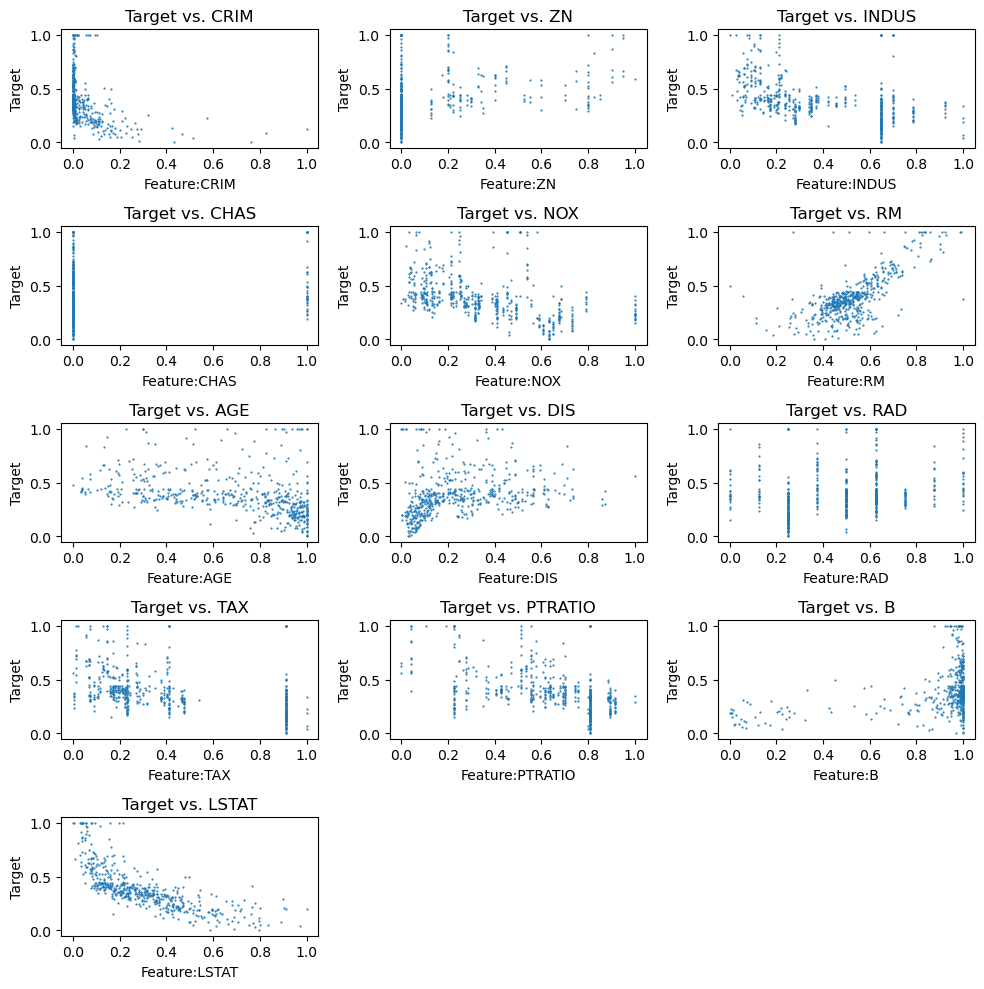

Feature/Intercept     Weight
        Intercept  26.125476
             CRIM -11.203628
               ZN   4.844651
            INDUS  -0.898724
             CHAS   3.328124
              NOX  -7.686859
               RM  17.494783
              AGE   0.588652
              DIS -14.354586
              RAD   7.431498
              TAX  -5.537231
          PTRATIO  -8.939745
                B   4.239173
            LSTAT -18.772746


Mean Squared Error: 18.896255908706834


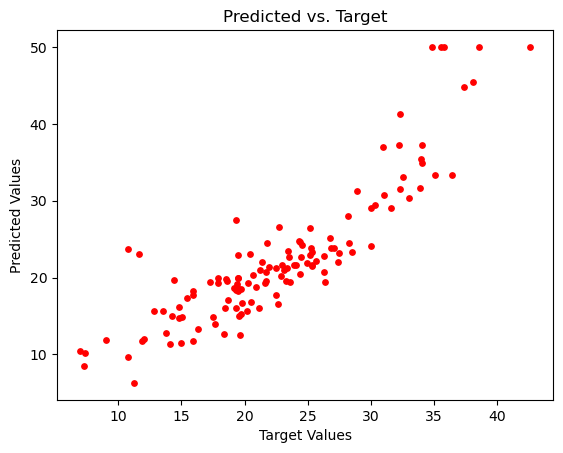



Mean Absolute Error: 3.1578374671447658
Coefficient of Determination:  0.7668895327325085


In [11]:
'''
#Main function
'''
def main():
    # Load the data 
    X, y, features = load_data()
    print("Features: {}".format(features))
    print('\n')
    
    #Converting to dataframe
    df_boston = pd.DataFrame(X, columns=features)  #features data
    df_boston['TARGET'] = y                        #Price or the target variable added to dataframe
    df_features = df_boston.loc[:, df_boston.columns != 'TARGET'].columns
    
    
    # Summarize and describe the data 
    summarize(df_boston, df_boston['TARGET'])
    
    # Visualize the features
    visualize(df_boston, df_boston['TARGET'], df_features)

    #TODO: Split data into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
    
    #Normalizing the training input data using MinMaxScaler, since the ranges of the dimensions are different
    normalizer = preprocessing.MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    
    #Normalizing test data with the parameters of the training data 
    X_test = normalizer.transform(X_test) 
    
    #Adding the biases
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

    # Fit regression model
    weights = fit_regression(X_train, Y_train)
    
    # Tabulate the features and their weights 
    tabulate(features, weights)

    # Compute fitted values, MSE, etc. 
    #Test the fitted model on the test set and calculate the Mean Square Error
    Y_pred = prediction(X_test, weights, Y_test)
    print('\n')
    #Calculate two more error measurement metrics  
    two_errors(Y_test, Y_pred)
    
    

if __name__ == "__main__":
    main()

In [12]:
'''
Implementation of locally reweighted least squares regression

Use k-fold cross-validation to compute the average loss for different values of τ in the
range [10,1000] when performing regression on the Boston Houses dataset. Plot these loss
values for each choice of τ (For this question fix λ = 10−5).

'''
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
from scipy.special import logsumexp
np.random.seed(0)

# load boston housing prices dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
x = boston['data']
N = x.shape[0]
x = np.concatenate((np.ones((506,1)),x),axis=1) #add constant one feature - no bias needed
d = x.shape[1]
y = boston['target']

idx = np.random.permutation(range(N))

/Users/pranavkhanolkar/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
def l2(A, B):
    '''
    Input: A is a Nxd matrix
           B is a Mxd matirx
    Output: dist is a NxM matrix where dist[i,j] is the square norm between A[i,:] and B[j,:]
    i.e. dist[i,j] = ||A[i,:]-B[j,:]||^2
    '''
    A = np.asarray(A, dtype=float)
    B = np.asarray(B, dtype=float)
        
    A_norm = (A**2).sum(axis=1).reshape(A.shape[0],1)
    B_norm = (B**2).sum(axis=1).reshape(1,B.shape[0])
    dist = A_norm+B_norm-2*A.dot(B.transpose())
    return dist

In [26]:
def LRLS(test_datum, x_train, y_train, tau, lam=1e-5):
    '''
    Given a test datum, it returns its prediction based on locally weighted regression

    Input: test_datum is a dx1 test vector
           x_train is the N_train x d design matrix
           y_train is the N_train x 1 targets vector
           tau is the local reweighting parameter
           lam is the regularization parameter
    output is y_hat the prediction on test_datum
    '''

    #Calculate the A-matrix (diagonal matrix) by seperatly computing the numerator and denominator    
    a_i_numerator = np.exp(np.divide(-(l2(test_datum.transpose(), x_train)), 2*(tau**2))) 
    a_i_denominator = np.exp(logsumexp(np.divide(-(l2(test_datum.transpose(), x_train)), 2*(tau**2))))
    a_i = np.divide(a_i_numerator, a_i_denominator)
    A = np.identity(a_i.shape[1])*a_i                            #Creating the diagonal matrix 'A'
    
    x_train = np.asarray(x_train, dtype=float)

    XT_A_X = np.dot(np.matmul(x_train.transpose(),A), x_train)
    XT_A_Y = np.dot(np.matmul(x_train.transpose(),A), y_train)
    
    #Lambda*I
    I = np.identity(XT_A_X.shape[0])
    lambda_I = lam*I
    
    #Compute the w*
    w = np.linalg.solve((XT_A_X + lambda_I), XT_A_Y)
    
    #Prediction on test data
    test_datum = np.asarray(test_datum, dtype=float)
    y_hat = np.dot(test_datum.transpose(), w)

    return y_hat

In [42]:
def run_on_fold(x_test, y_test, x_train, y_train, taus):
    '''
    Input: x_test is the N_test x d design matrix
           y_test is the N_test x 1 targets vector        
           x_train is the N_train x d design matrix
           y_train is the N_train x 1 targets vector
           taus is a vector of tau values to evaluate
    output: losses a vector of average losses one for each tau value
    '''
    N_test = x_test.shape[0]
    losses = np.zeros(taus.shape)
    for j,tau in enumerate(taus):
        predictions =  np.array([LRLS(x_test[i,:].reshape(d,1),x_train,y_train, tau) \
                        for i in range(N_test)])
        losses[j] = ((predictions.ravel()-y_test.ravel())**2).mean()
    return losses

In [49]:
def run_k_fold(x, y, taus, k):
    '''
    Input: x is the N x d design matrix
           y is the N x 1 targets vector    
           taus is a vector of tau values to evaluate
           K in the number of folds
    output is losses a vector of k-fold cross validation losses one for each tau value
    '''
    print('Starting the k-fold cross validation')
    #Integer denoting the size of folds in the k-fold cross validation (kCV)
    fold_size = int(len(x) / k)     #The if-else statement used below transfers 
                                    #all the remaining datapoints to the last fold set in case len(x)/k in not an integer
    upper = fold_size               #Upper limit of the index-range pertaining to one fold-group 
    lower = 0                       #Lower limit of the index-range pertaining to one fold-group   
    Loss_vector = np.zeros(taus.shape) #Initilaizng the output loss veator
    for j in range (k):
        if j < (k-1):
            X_test = x[lower:upper,:]                #The input-test set for the kCV 
            x_list = [i for i in range(lower,upper)] #List regarding the index range to be removed from input-data
            X_train = np.delete(x, x_list, axis=0)   #Remaining input-data to be used for training
            Y_test = y[lower:upper]                  #The target-test set for the kCV
            y_list = [i for i in range(lower,upper)] #List regarding the index range to be removed from target-data
            Y_train = np.delete(y, y_list, axis=0)   #Remaining target-data to be used for training
            lower = lower+fold_size                  #Update lower limit of the index-range
            upper = upper+fold_size                  #Update upper limit of the index-range
            
        else:                                         #The following lines tranfer all the remaining data into the last fold group
            X_test = x[lower:,:]                      #The input-test set for the kCV 
            x_list = [i for i in range(lower,len(x))] #List regarding the index range to be removed from input-data
            X_train = np.delete(x, x_list, axis=0)    #Remaining input-data to be used for training
            Y_test = y[lower:]                        #The target-test set for the kCV
            y_list = [i for i in range(lower,len(x))] #List regarding the index range to be removed from target-data
            Y_train = np.delete(y, y_list, axis=0)    #Remaining target-data to be used for training

            
        loss = run_on_fold(X_test, Y_test, X_train, Y_train, taus) #Compute the loss using run_on_fold function
        print('Completed {} out of {}-folds'.format(j+1,k)) #Track the progress
        Loss_vector = Loss_vector + loss                    #Update output loss veator      
    average_loss = Loss_vector / k                          #Compute the average loss for all the tau values
    
    return average_loss

Starting the k-fold cross validation
Completed 1 out of 10-folds
Completed 2 out of 10-folds
Completed 3 out of 10-folds
Completed 4 out of 10-folds
Completed 5 out of 10-folds
Completed 6 out of 10-folds
Completed 7 out of 10-folds
Completed 8 out of 10-folds
Completed 9 out of 10-folds
Completed 10 out of 10-folds


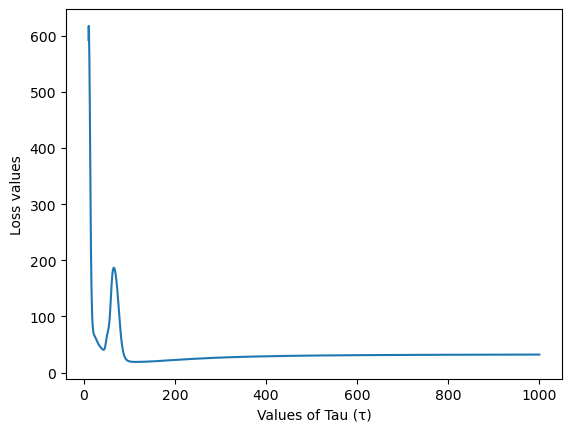

min loss = 18.90480787019021


In [50]:
if __name__ == "__main__":

    #We fixed lambda (hard coded to 1e-5) and only set tau value. Feel free to play with lambda as well if you wish
    taus = np.logspace(1.0,3,200)
    losses = run_k_fold(x,y,taus, k=10) #Selecting k = 10 for k-cross validation
    plt.plot(taus, losses)
    plt.xlabel('Values of Tau (\u03C4)')
    plt.ylabel('Loss values')
    plt.show()
    print("min loss = {}".format(losses.min()))